In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib


In [3]:
filepath = './tweets.csv'

df = pd.read_csv(filepath, delimiter=',',
                skiprows=1, # skips the first line of the file
                encoding='unicode_escape', # prevents errors on unknown symbols
                usecols=['Vertex 1', 'Vertex 2', 'Tweet'], # only import the columns we use
                )
df.columns = ['source_user', 'mentioned_user', 'tweet_text']

In [4]:
G = nx.DiGraph()


for source_user, mentioned_user, tweet_text in zip(df.source_user, df.mentioned_user, df.tweet_text):

    if source_user != mentioned_user:
        if "RT" in tweet_text[:3]:
            color = 'red'
        else:
            color = 'green'
        if (source_user, mentioned_user) in G.edges:
            n = G.edges[source_user,mentioned_user]['n'] + 1
        else:
            n = 1

        G.add_edge(source_user, mentioned_user, color=color, n=n)





In [5]:
G.number_of_nodes()

344

In [6]:
G.number_of_edges()

434

In [7]:
measures = {"centrality": {'in_degree': nx.in_degree_centrality(G), 'out_degree': nx.out_degree_centrality(G),
                           'betweenness': nx.betweenness_centrality(G), 'closeness': nx.closeness_centrality(G)}}

In [8]:
in_degree = list(measures['centrality']['in_degree'].values())

for i, x in enumerate(in_degree):
    in_degree[i] = x*100000
    if in_degree[i] < 300:
        in_degree[i] = 300

in_degree

[300,
 2915.451895043732,
 3790.0874635568516,
 1457.725947521866,
 1166.1807580174927,
 874.6355685131196,
 1166.1807580174927,
 583.0903790087464,
 583.0903790087464,
 1166.1807580174927,
 300,
 2623.906705539359,
 300,
 300,
 11078.71720116618,
 300,
 2040.816326530612,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 1457.725947521866,
 300,
 2040.816326530612,
 300,
 300,
 300,
 300,
 300,
 1166.1807580174927,
 300,
 300,
 300,
 583.0903790087464,
 300,
 300,
 1166.1807580174927,
 1166.1807580174927,
 1457.725947521866,
 874.6355685131196,
 1166.1807580174927,
 300,
 583.0903790087464,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 1166.1807580174927,
 1166.1807580174927,
 300,
 583.0903790087464,
 1457.725947521866,
 583.0903790087464,
 300,
 300,
 300,
 300,
 300,
 1166.1807580174927,
 300,
 300,
 300,
 3498.542274052478,
 300,
 300,
 2915.451895043732,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 583.0903790087464,
 583.0903790087

In [9]:
out_degrees = []
for key, value in nx.out_degree_centrality(G).items():
    out_degrees.append(value)

minima = min(in_degree)
maxima = max(in_degree)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
node_colors = []
for v in out_degrees:
    node_colors.append(mapper.to_rgba(v)[0])

In [10]:
glabels = list(G.nodes)

top_in = np.argsort(in_degree)[-5:]
top_out = np.argsort(out_degrees)[-5:]

labels = {}

for i, label in enumerate(glabels):
    if i in top_in or i in top_out:
        labels[label] = label
    else:
        labels[label] = ""

In [11]:
colors = []
width = []

for edge in G.edges:
    colors.append(G.edges[edge[0],edge[1]]['color'])
    width.append(pow(G.edges[edge[0],edge[1]]['n'],2))

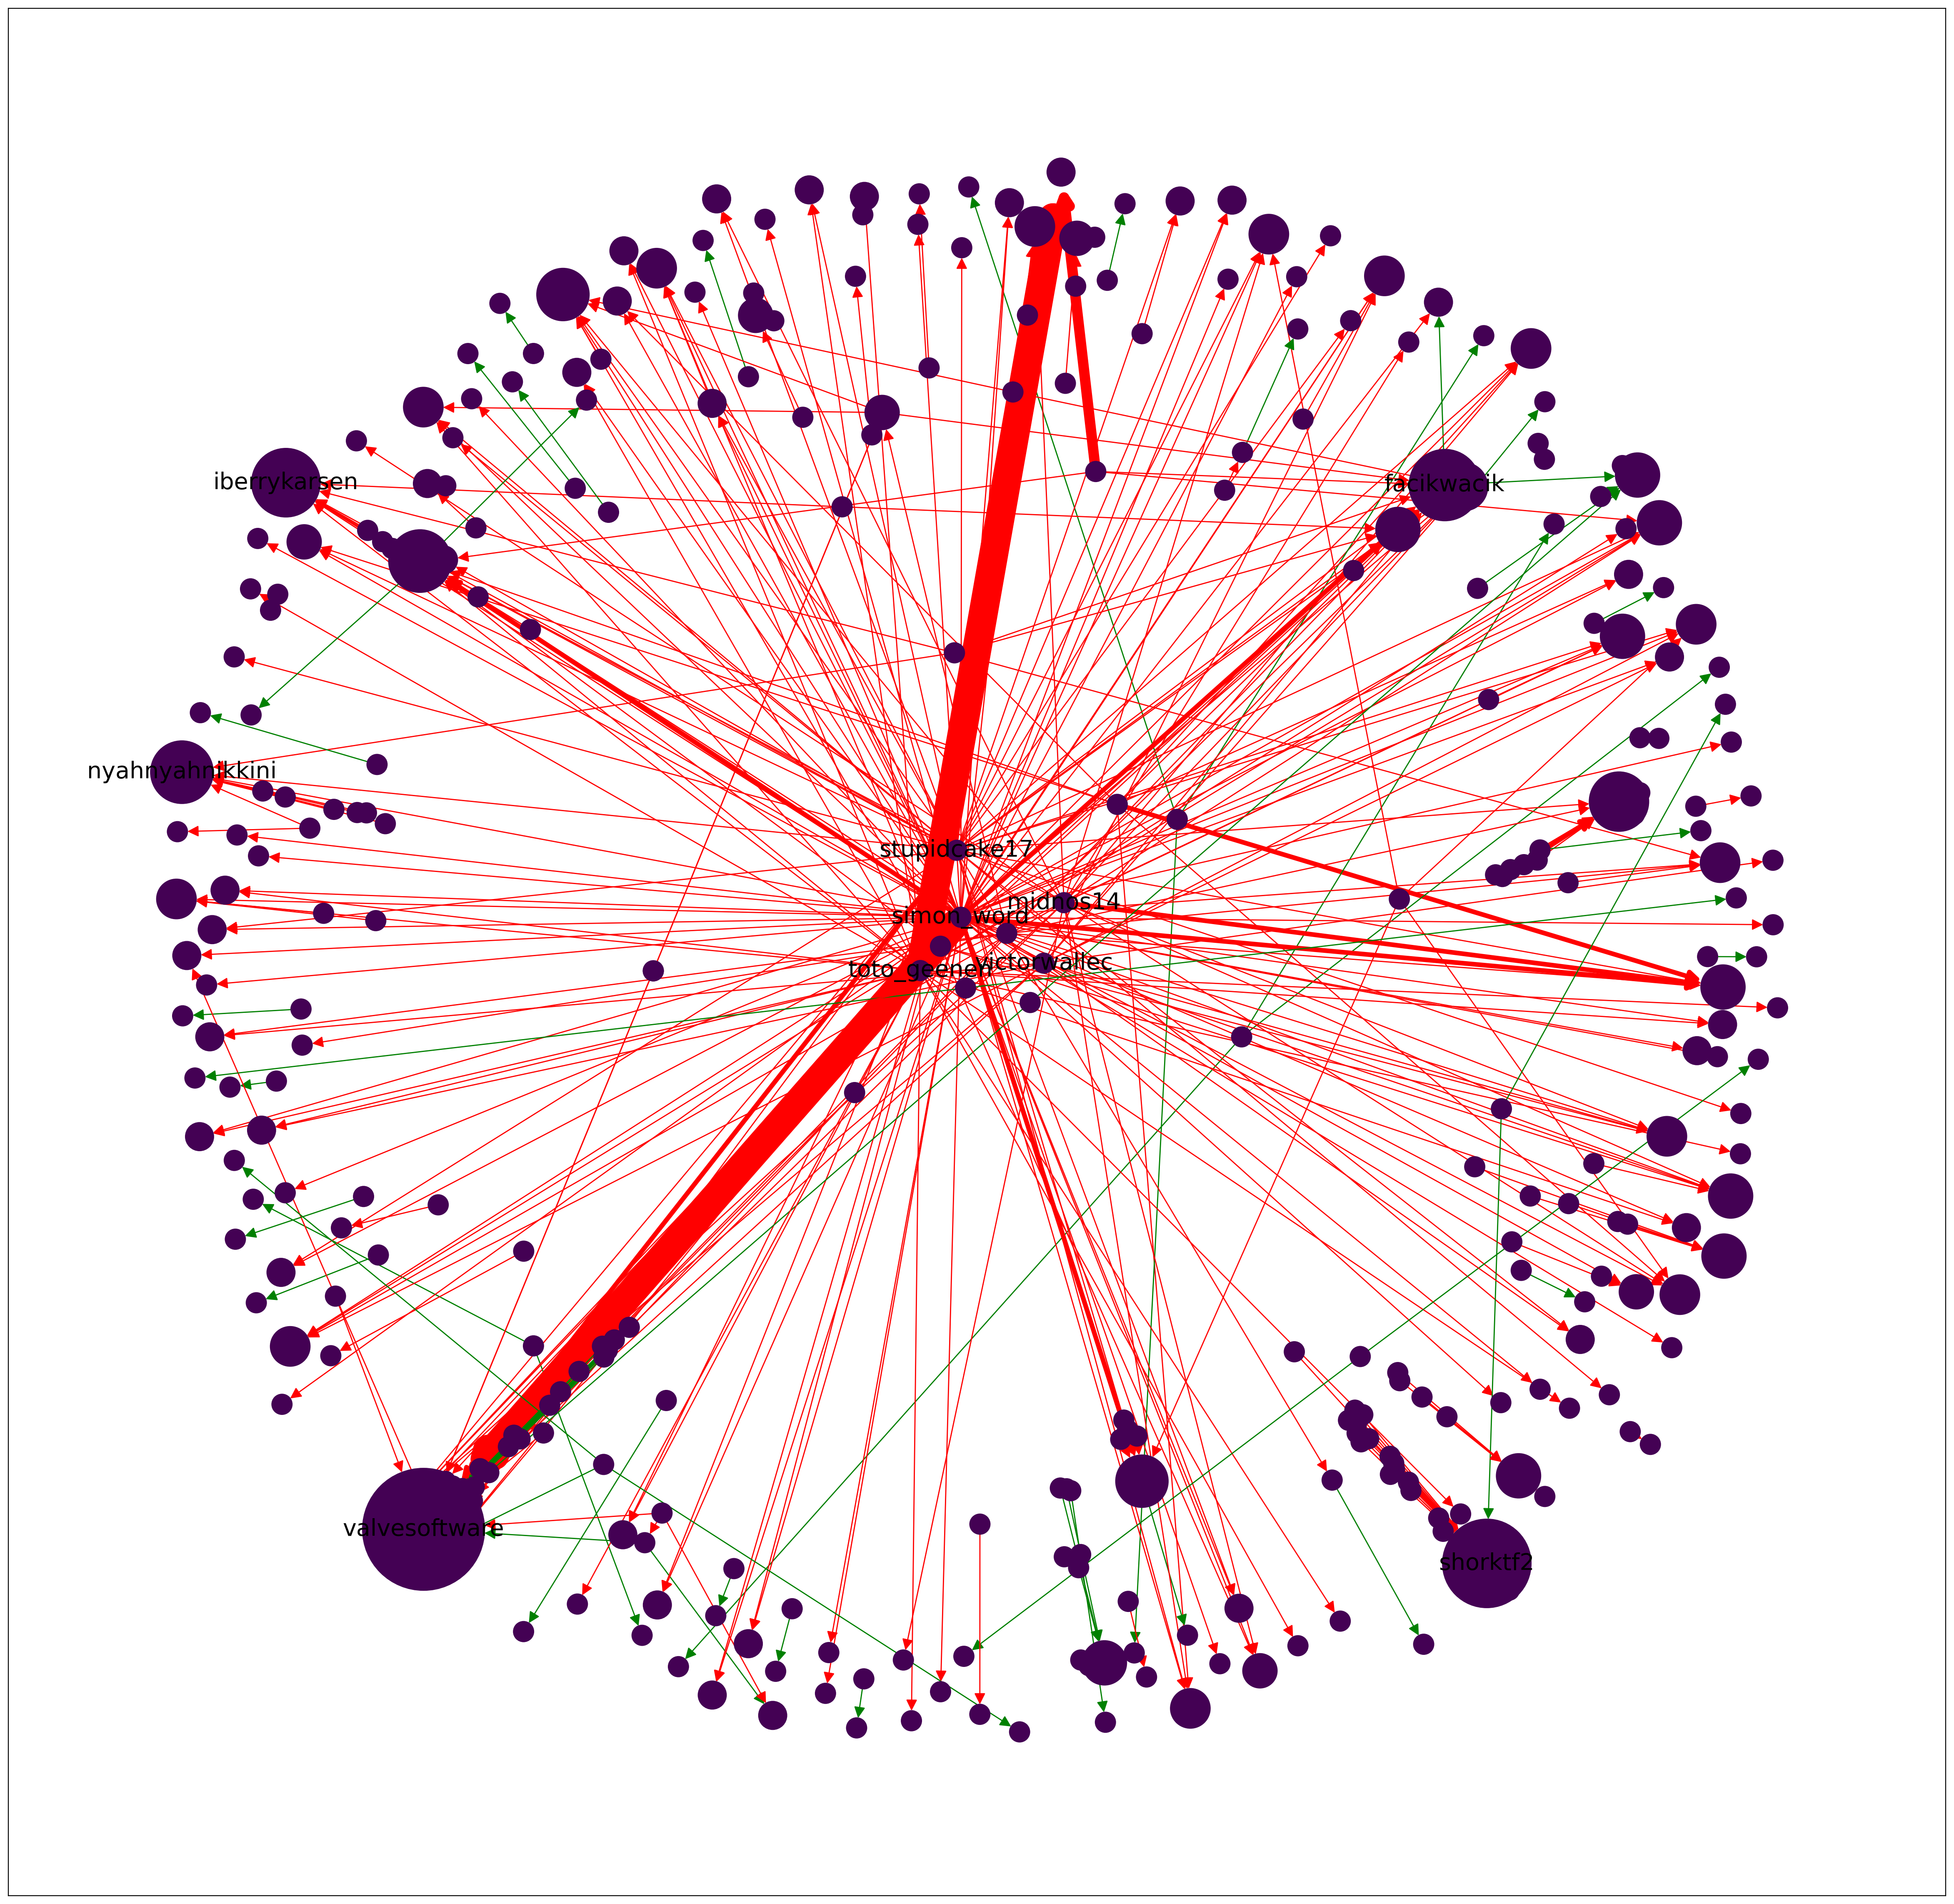

In [12]:
plt.figure(figsize=(30, 30), dpi= 200)
nx.draw_networkx(G= G, labels=labels, arrowsize=20, font_color='black',font_size=20, width=width, edge_color=colors, node_size=in_degree, node_color=node_colors)

In [16]:
for measure in ["betweenness" ,"closeness", "in_degree", "out_degree"]:
    print("top 5 of measure " + measure + ":")
    for n in np.argsort(list(measures["centrality"][measure].values()))[-5:]:
        print(glabels[n])

top 5 of measure betweenness:
seriel18
khaki_jeanart
dude_stay
penalozalao
facikwacik
top 5 of measure closeness:
steam
iberrykarsen
facikwacik
shorktf2
valvesoftware
top 5 of measure in_degree:
dude_stay
iberrykarsen
facikwacik
shorktf2
valvesoftware
top 5 of measure out_degree:
victorwallec
midnos14
toto_geenen
stupidcake17
simon_word
